# Handling the missing data in Titanic

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('files/titanic3.xlsx', engine='openpyxl')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
missing_values = df.isnull().sum()
print(missing_values)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [4]:
mode_age = df['age'].mode()[0]
df_imputed = df['age'].fillna(mode_age) 

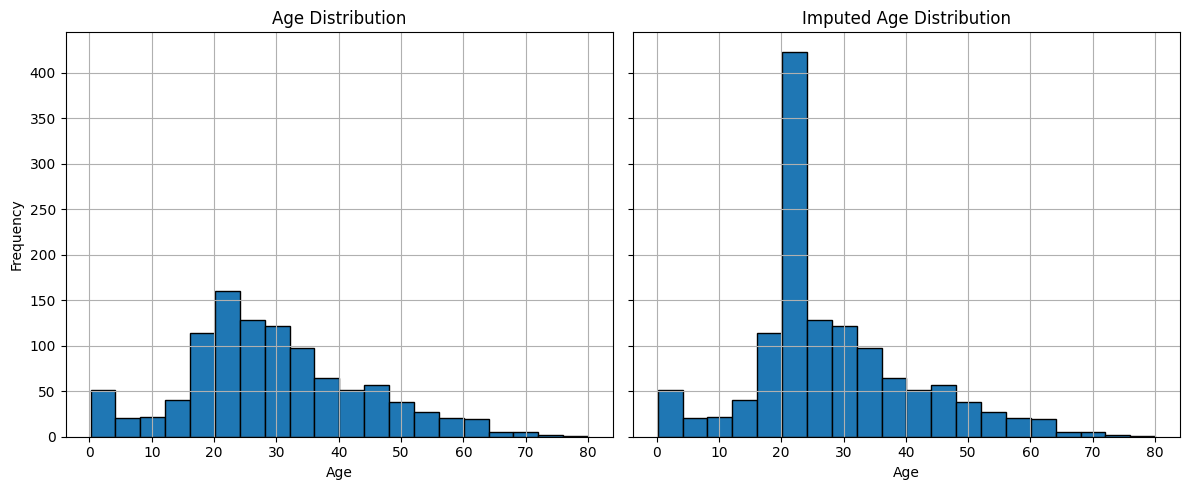

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Original age distribution
df['age'].hist(bins=20, edgecolor='black', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Imputed age distribution
df_imputed.hist(bins=20, edgecolor='black', ax=axes[1])
axes[1].set_title('Imputed Age Distribution')
axes[1].set_xlabel('Age')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features for regression
features = ['pclass', 'sibsp', 'parch', 'fare']
df_features = df[features]
df_features = df_features.fillna(df_features.mean())  # Fill missing values in features

# Split data into training and prediction sets
train_data = df[df['age'].notnull()]
predict_data = df[df['age'].isnull()]

X_train = train_data[features]
y_train = train_data['age']
X_predict = predict_data[features]

# Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict missing ages
predicted_ages = regressor.predict(X_predict)

# Impute the missing values
df.loc[df['age'].isnull(), 'age'] = predicted_ages

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
Example: Predicting Customer Purchase Behavior

Suppose you're building a model to predict whether a customer will make a purchase in the next 30 days. Your raw dataset contains:
last_purchase_date, number_of_site_visits, customer_location, signup_date, total_items_viewed, is_subscribed_to_newsletter